In [1]:
# face detection - is detecting if a face is present in a photo or not 

In [2]:
# face recognition - identifying the face that was present in the photo 

In [3]:
import cv2
import os
import face_recognition
import matplotlib.pyplot as plt
from PIL import Image
TOLERANCE = 0.6
FRAME_THICKNESS = 3
FONT_THICKNESS = 2
MODEL = "cnn"  # hog 


In [4]:
print("Loading known faces")

Loading known faces


In [5]:
known_faces = []
known_names = []

import os


In [6]:
KNOWN_FACES_DIR = "known_faces"
UNKNOWN_FACES_DIR = "unknown_faces"

deal-with-it.jpg
bci.jpg
ad6c5200477bd377f69a8d3dc9a7f3cd.png
[array([-1.25560731e-01,  5.46645671e-02,  1.40628606e-01, -5.17507792e-02,
       -1.58131674e-01,  1.20058395e-02, -2.14979202e-02, -5.06136641e-02,
        1.27987633e-03, -8.16265717e-02,  1.51630595e-01, -6.39069080e-02,
       -2.44293943e-01, -2.82181986e-02,  8.67056549e-02,  1.53670117e-01,
       -4.29345518e-02, -1.39911130e-01, -1.93479180e-01, -9.97111797e-02,
       -1.16897859e-02,  3.13459672e-02, -4.14233394e-02,  5.92755601e-02,
       -1.85116217e-01, -3.08418304e-01, -3.46625522e-02, -2.86274627e-02,
        5.58578186e-02, -7.50992447e-02, -5.38767688e-02,  1.09180875e-01,
       -1.59133911e-01,  2.18060650e-02,  5.26872799e-02,  1.65530667e-01,
       -5.22468425e-02, -1.23240300e-01,  1.48803443e-01, -8.59589875e-02,
       -1.60002977e-01,  1.51527487e-02,  7.47788996e-02,  2.08337277e-01,
        1.20940007e-01,  1.98622476e-02,  1.12808958e-01, -9.45651438e-03,
        6.44460022e-02, -2.24799350e-

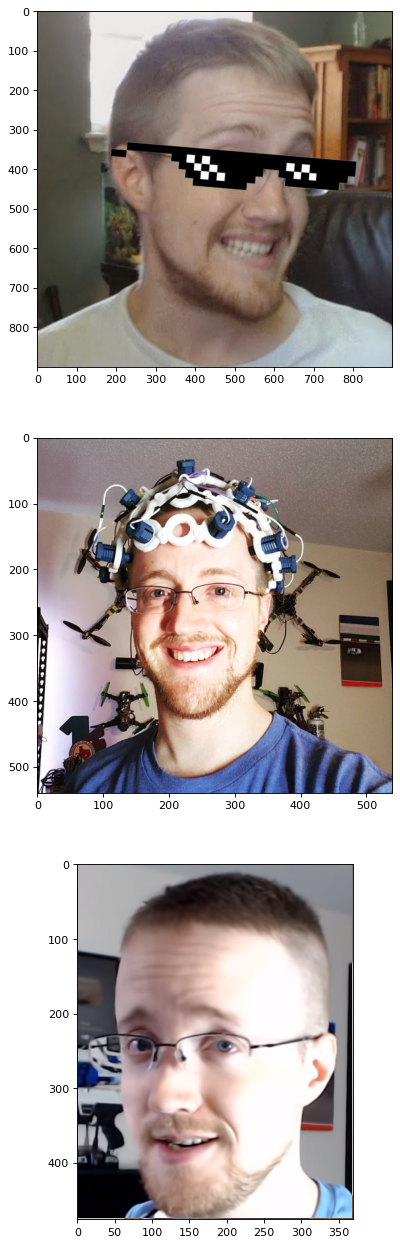

In [7]:
for name in os.listdir(KNOWN_FACES_DIR):
    i = 1
    plt.figure(figsize = (20,20), dpi = 80)
    for filename in os.listdir(f"{KNOWN_FACES_DIR}/{name}"):
        print(filename)
#         im = Image.open(f"{KNOWN_FACES_DIR}/{name}/{filename}")
#         plt.figure(figsize = (20,20), dpi = 80)
        plt.subplot(3,1,i)
        i+=1
#         plt.imshow(im)
        
        
        image = face_recognition.load_image_file(f"{KNOWN_FACES_DIR}/{name}/{filename}")
        plt.imshow(image)
        
        #this is going to encode all of the faces it find
        encoding = face_recognition.face_encodings(image)[0]
        
        known_faces.append(encoding)
        known_names.append(name)

print(known_faces)
print(known_names)

In [8]:
print("processing unknown faces")

processing unknown faces


snowdex.jpg
for image 1
[(78, 355, 248, 185)]
Match found: Sentdex
whos_dat.jpg
for image 2
[(175, 268, 293, 150)]
da_winnah.jpg
for image 3
[(197, 341, 244, 294)]
Match found: Sentdex
christmas_time.jpg
for image 4
[(150, 221, 249, 122)]
doggo.jpg
for image 5
[(240, 218, 338, 120)]
Match found: Sentdex
weirdo.jpg
for image 6
[(84, 220, 202, 103)]
snowdex_copypasta.jpg
for image 7
[(389, 115, 480, 17), (270, 224, 368, 126), (389, 244, 480, 146), (270, 95, 368, 0), (389, 364, 480, 265), (140, 224, 239, 126), (0, 359, 110, 241), (14, 218, 96, 136), (270, 354, 368, 256), (140, 95, 239, 0), (14, 93, 96, 11)]
Match found: Sentdex
Match found: Sentdex
Match found: Sentdex
Match found: Sentdex
Match found: Sentdex
Match found: Sentdex
Match found: Sentdex
Match found: Sentdex
Match found: Sentdex
Match found: Sentdex
Match found: Sentdex
buy_nnfs_book.jpg
for image 8
[]
om_nom_nom.jpg
for image 9
[(52, 335, 170, 217), (153, 88, 193, 49)]
Match found: Sentdex
Match found: Sentdex
mr_always_wro

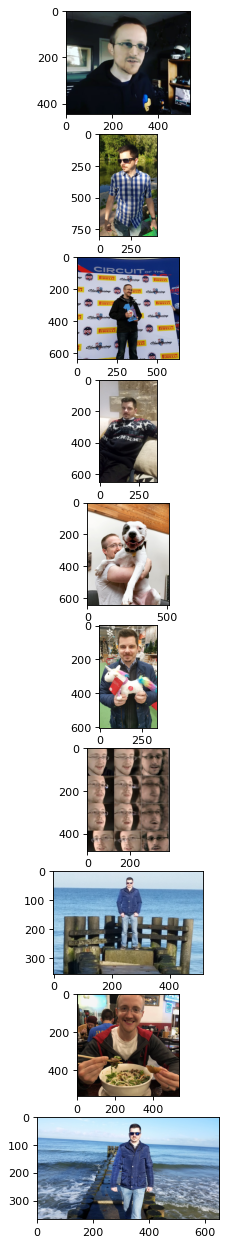

In [9]:
i = 1
plt.figure(figsize = (20,20), dpi = 80)
for filename in os.listdir(UNKNOWN_FACES_DIR):
    print(filename)
    image = face_recognition.load_image_file(f"{UNKNOWN_FACES_DIR}/{filename}")
    locations = face_recognition.face_locations(image, model = MODEL)
    encodings = face_recognition.face_encodings(image, locations)
    print(f"for image {i}")
    print(locations)
    plt.subplot(len(os.listdir(UNKNOWN_FACES_DIR)),1,i)
    i+=1
    plt.imshow(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    
    for face_encoding , face_location in zip(encodings,locations):
        results = face_recognition.compare_faces(known_faces, face_encoding, TOLERANCE)
        match = None
        if True in results:
            match = known_names[results.index(True)]
            print(f"Match found: {match}")
            
    

In [10]:
!python --version

Python 3.8.3


In [11]:
import numpy as np

In [12]:
a=np.array([1,2,3])
b=bool(a)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()